___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,7)
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
#Here I am seeing the shape of my data
df.shape
#As we can see there are 200 rows and 5 columns

(200, 5)

In [4]:
#To see the columns of the data
df.columns
#There are not a lot of columns only 5

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
#Here, i am seeing the info of the data
df.info()
#As we can see there are about 200 entries from 0 to 199
#There are 5 columns
#In all the 5 columns, there is no null data, which is a good thing
#There are 4 of them are int, and one of them is object which is the gender of course.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#To look more on the data
df.describe()
#From here we can say that, it seems that there is no outliers

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [7]:
#Let's see now, if there is any duplicated values on our data
df.duplicated().sum().any()
#As we can see, there is no duplicated data, which is a good thing

False

In [8]:
#Let's check if there is any null values
df.isnull().sum().any()
#As we can see, there is no null data. Pretty good.

False

### Now let's check our data more

In [9]:
#Let's start with the first column, which is CustomerID. 
df['CustomerID']
#We can say that from its name, it is a useless one, and will not benefits us

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: CustomerID, Length: 200, dtype: int64

In [10]:
df['CustomerID'].nunique()
#It has 200 values

200

In [11]:
#The shape of our data before dropping CustomerID from our data, which is (200, 5)
df.shape

(200, 5)

In [12]:
#Now, let's drop CustomerID. It is a column.
df.drop(["CustomerID"], axis = 1, inplace=True)

In [13]:
#The shape of our data after dropping CustomerID from our data, which is (200, 4)
df.shape

(200, 4)

In [14]:
#Now, let's take a look at the second column, which is Gender
df['Gender']
#As we can see, it is an object and its value is Male and Female

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [15]:
df['Gender'].value_counts()
#As we can see, the female has 112 and the male has 88 values

Gender
Female    112
Male       88
Name: count, dtype: int64

In [16]:
df_copy = df.copy()
df_copy

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [17]:
#Now, to be able to use with our data, I have to map it. 
#The male will be 0 and the female will be 1
mapping = {'Male': 0, 'Female': 1}

df_copy['Gender'] = df_copy['Gender'].map({'Male': 0, 'Female': 1})

In [18]:
#Now, let's see them after mapping
df_copy['Gender']
#They are 0 and 1 now

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

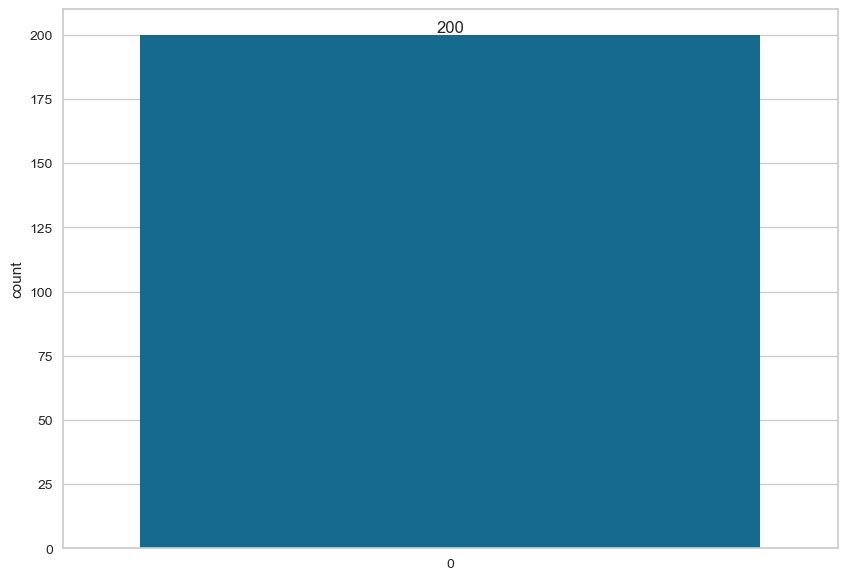

In [19]:
#Now, let's visualize the data of Gender
gen = sns.countplot(df_copy['Gender'])
gen.bar_label(gen.containers[0]);

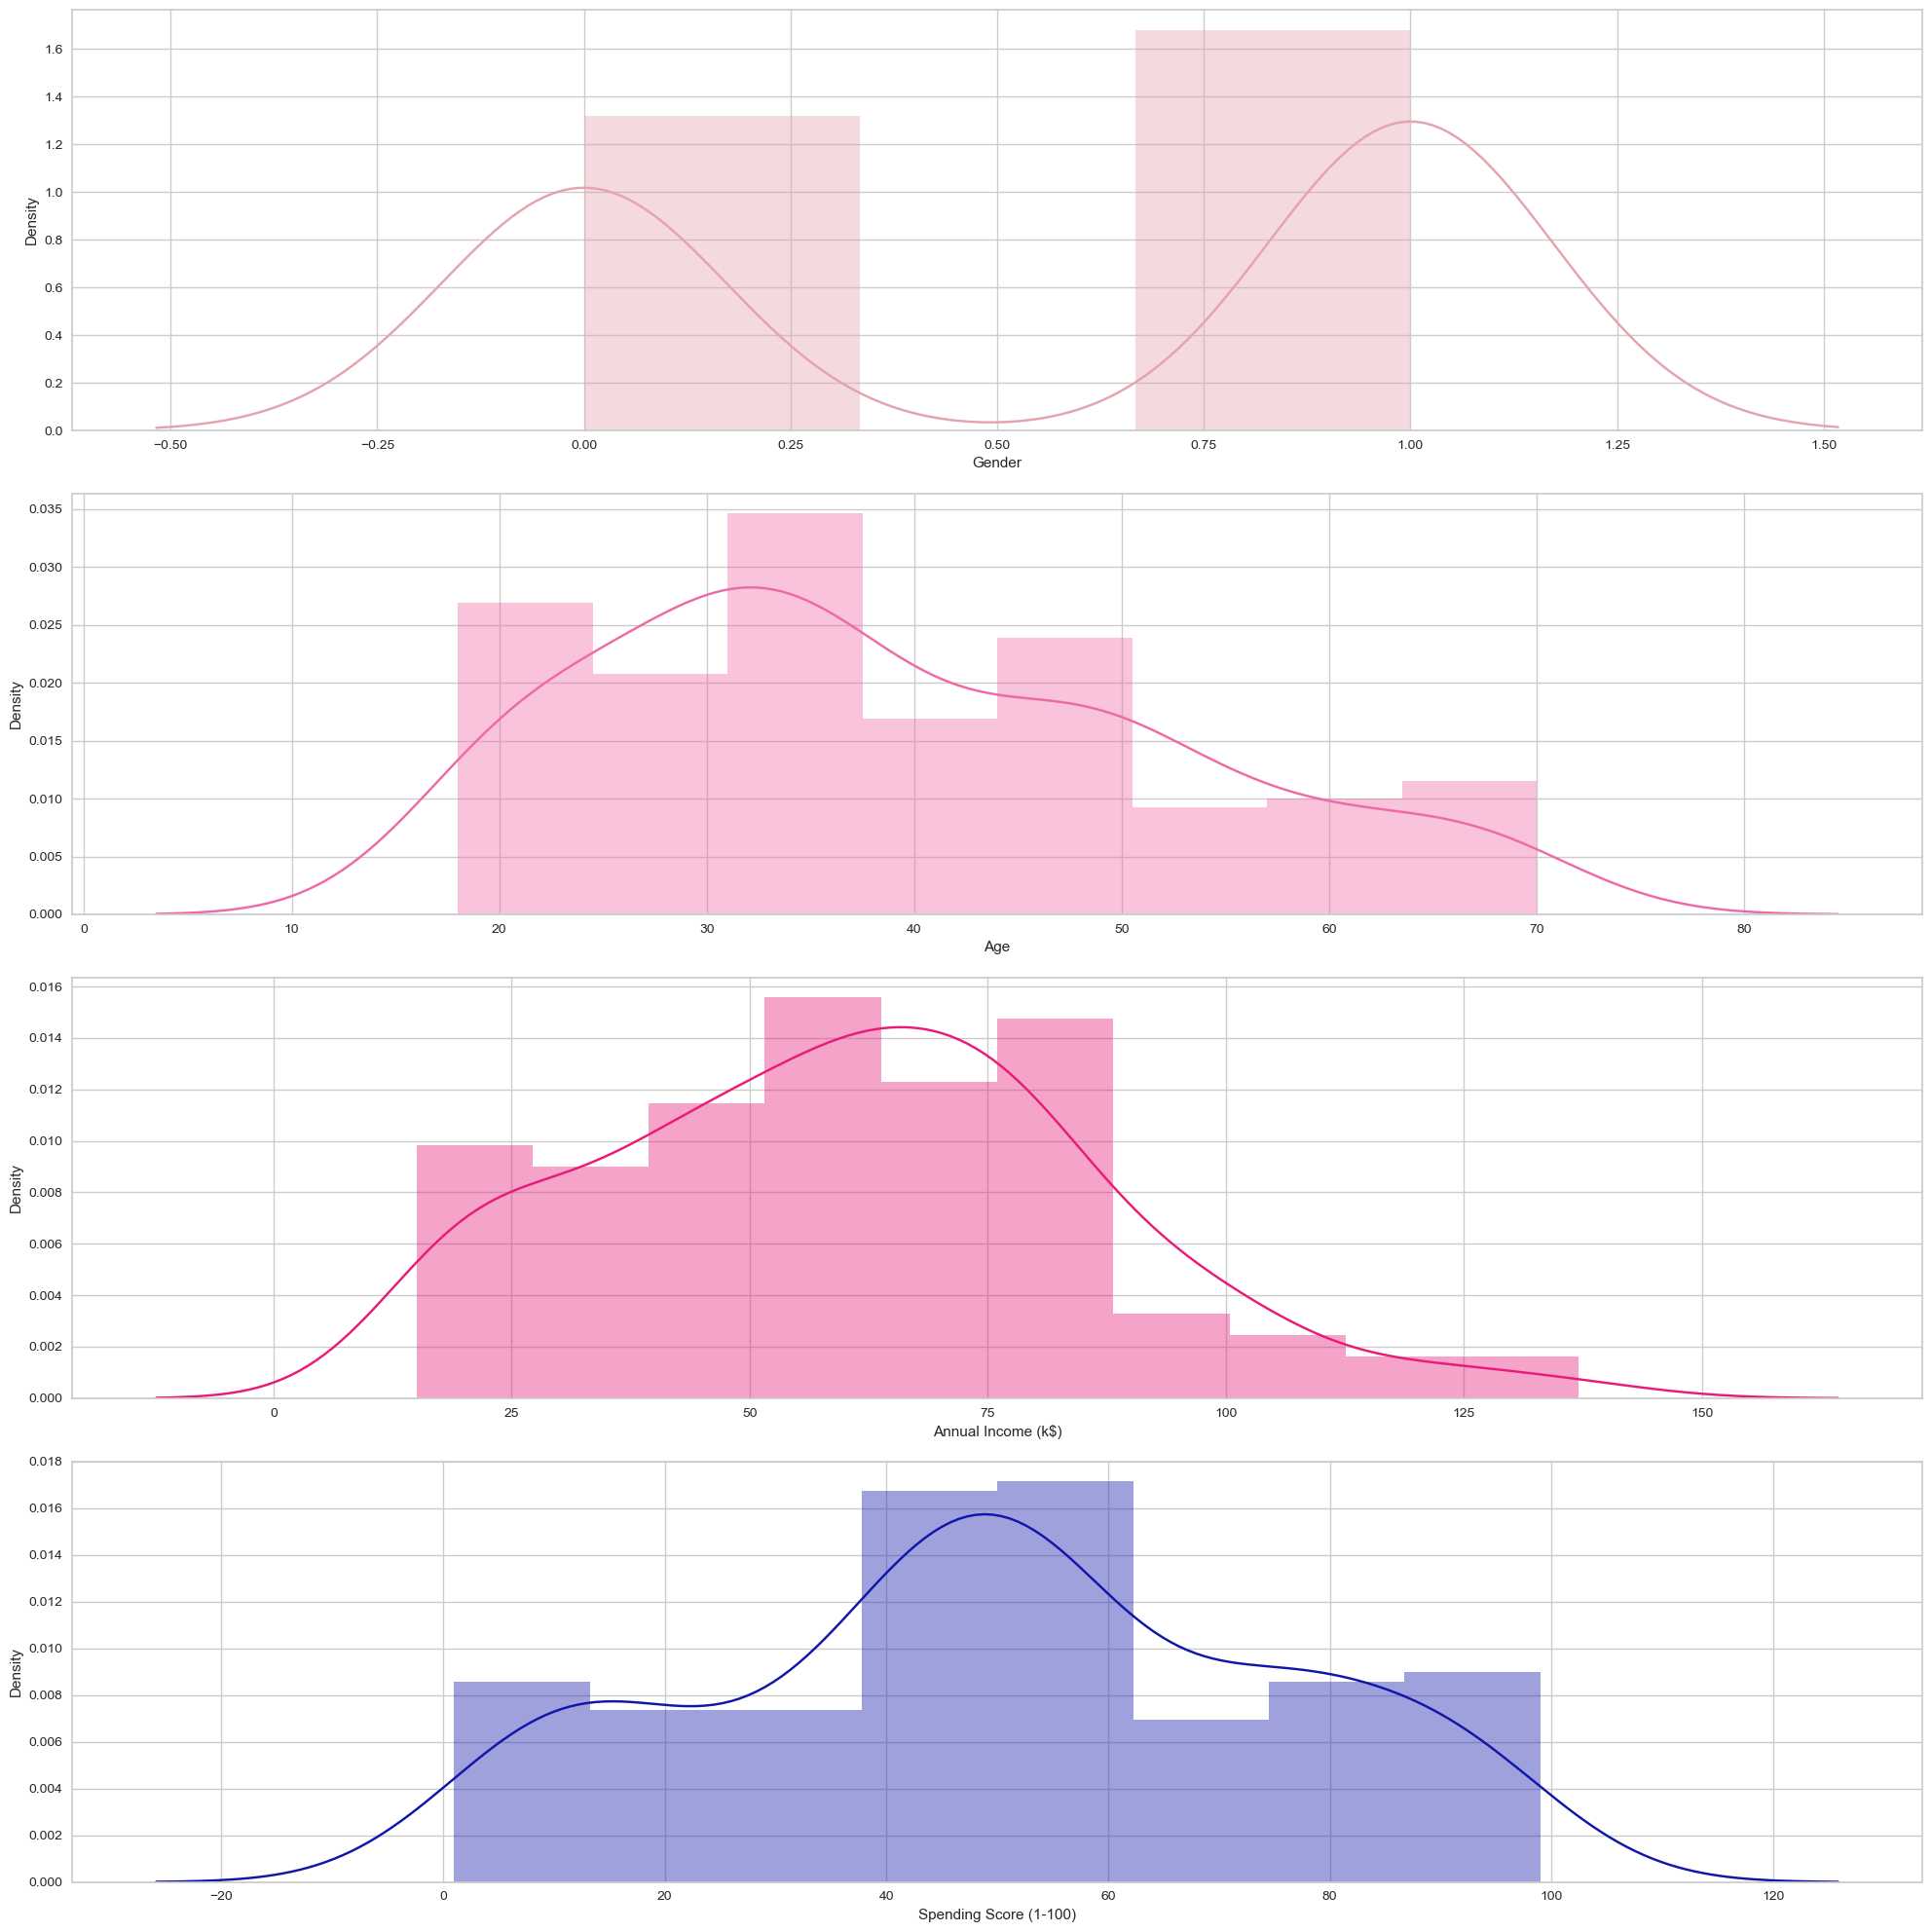

In [20]:
#Here, I am plotting the four columns
color = ["#e5a3ad", "#ee6aa7", "#ea1a78", "#1016a9"]
plt.figure(figsize = (20, 20))
column=['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,4):
    plt.subplot(4, 1, i+1)
    sns.distplot(df_copy[column[i]], color= color[i])   
    plt.tight_layout()

#we can see from the graphs that the femals are more than the men.
#The annual income starts to decrease from about 85

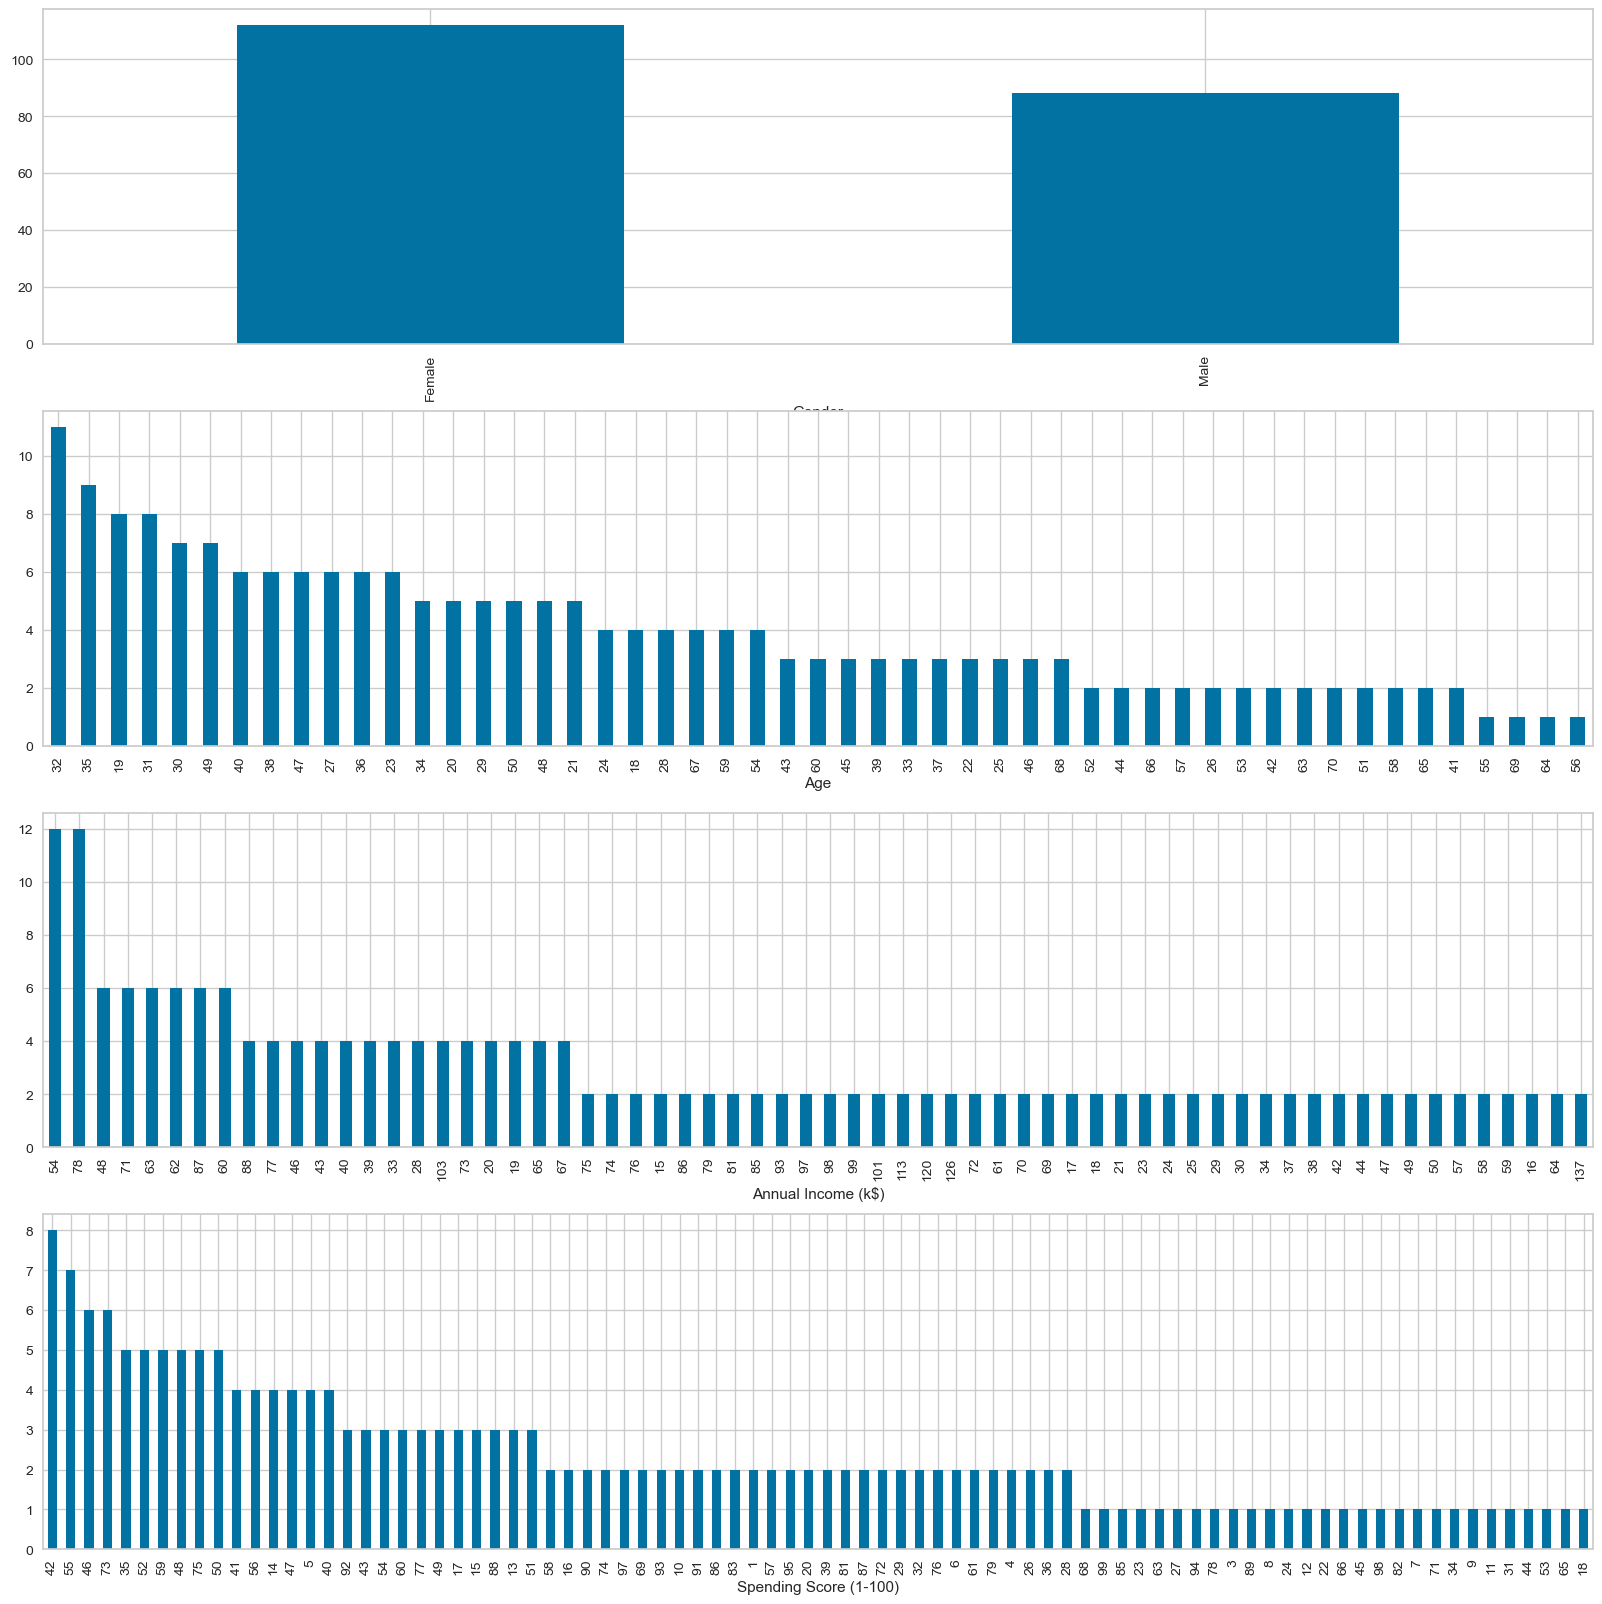

In [21]:
column=['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,4):
      plt.subplot(4, 1, i+1)
      df[column[i]].value_counts().plot.bar(figsize = (20, 20))

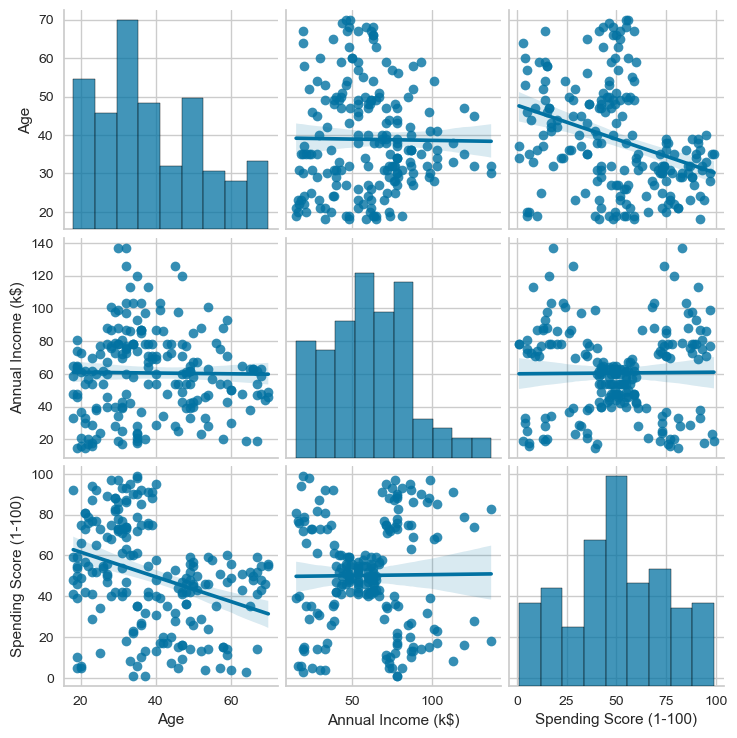

In [22]:
#Now, let's see tha pair plot
sns.pairplot(df, kind="reg")
plt.show()

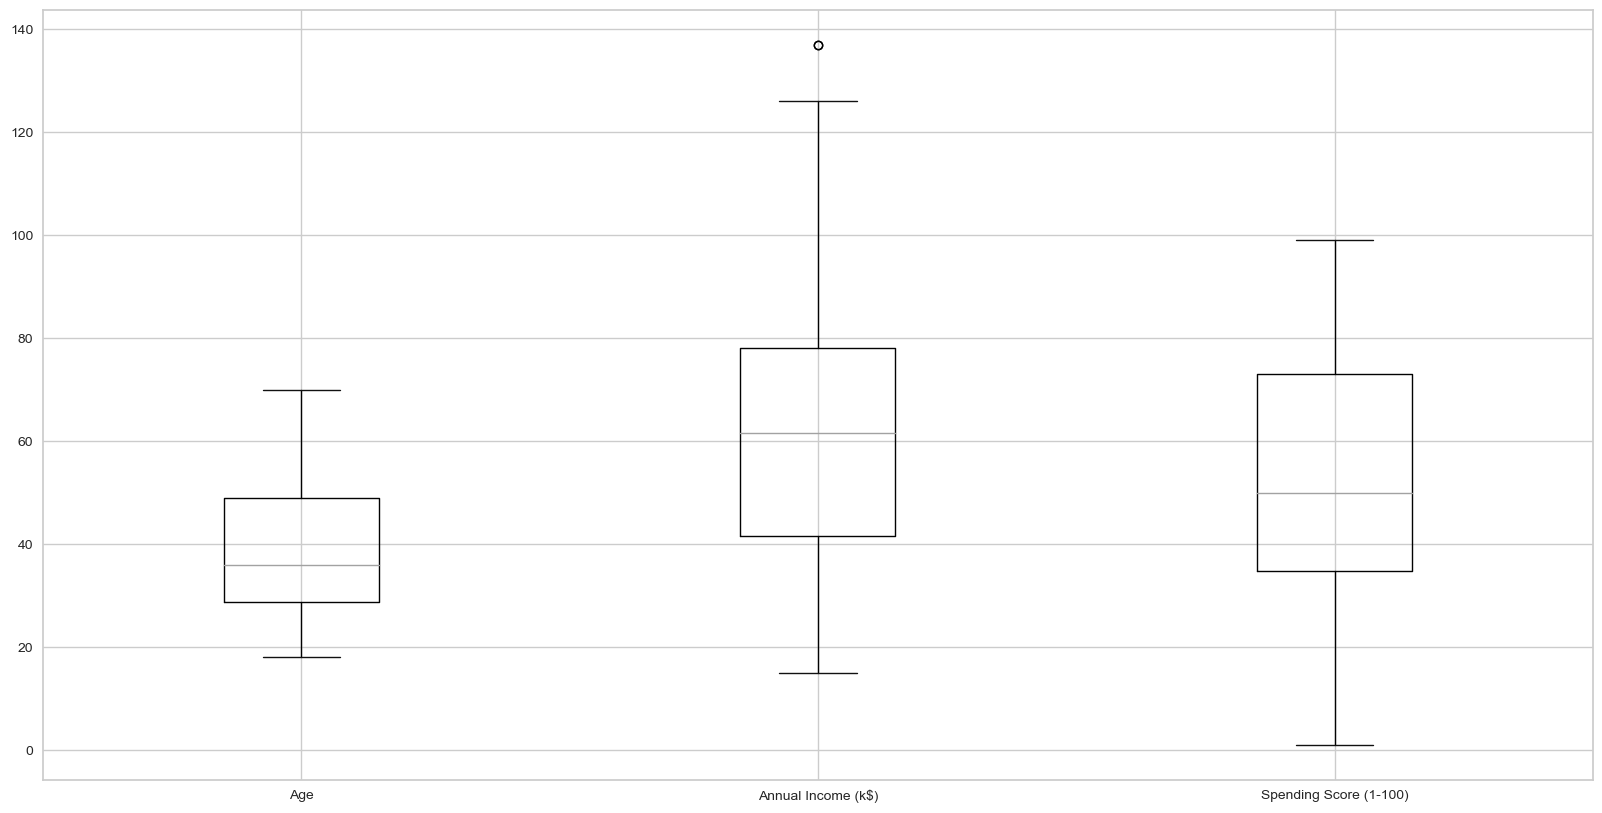

In [23]:
#Now, let's see the data with box plot, which is useful for outliers
plt.figure(figsize =(20,10))
df.boxplot()
plt.show()
# we can see that there is no outliers, only one strange one in annula income.

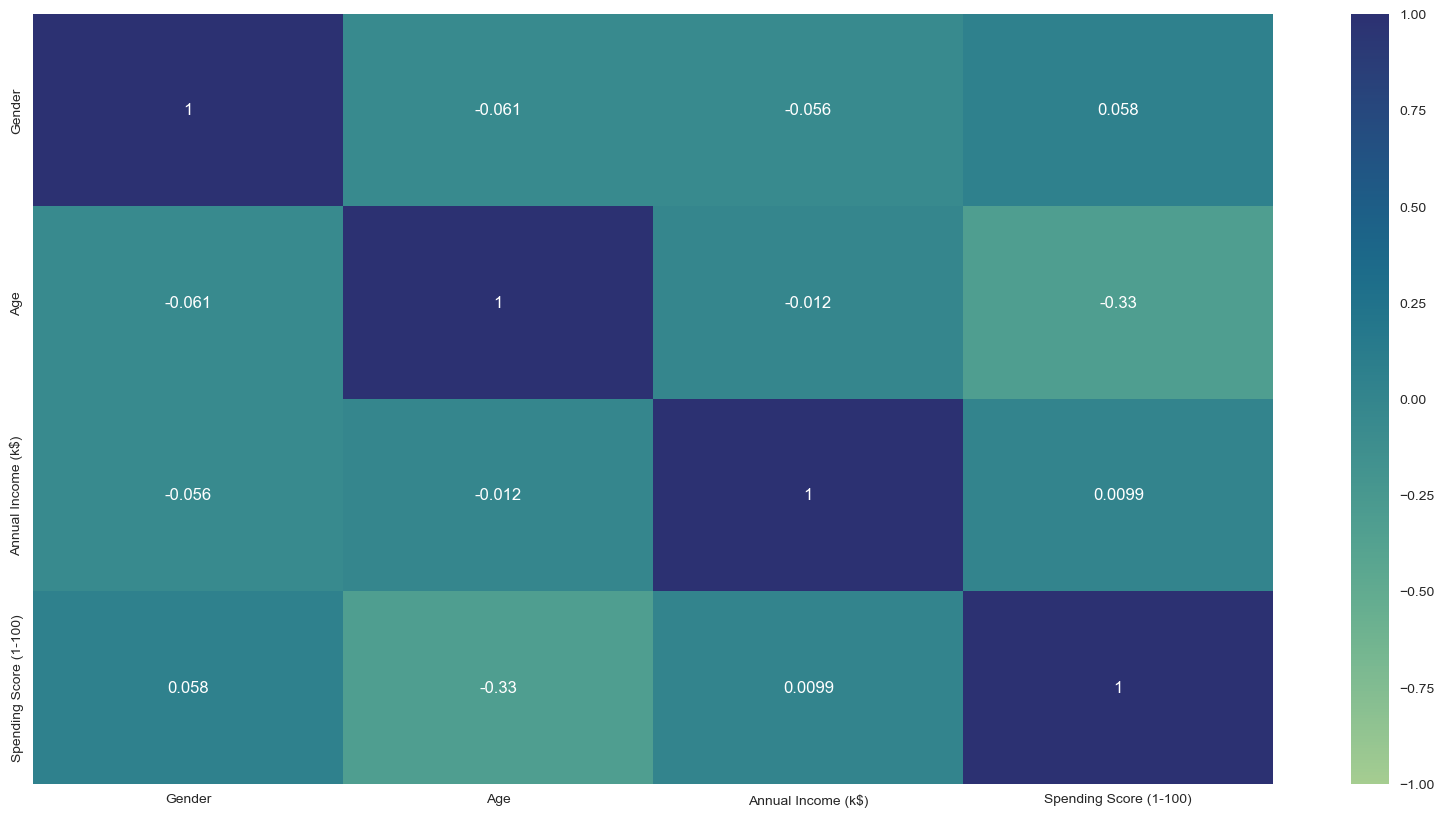

In [24]:
#Now, let's see if there is a multicolinuraty in our data, or correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_copy.corr(), annot = True, vmin=-1, vmax=1, cmap="crest")
plt.show()
#As we can see, there is no correlation in our data.

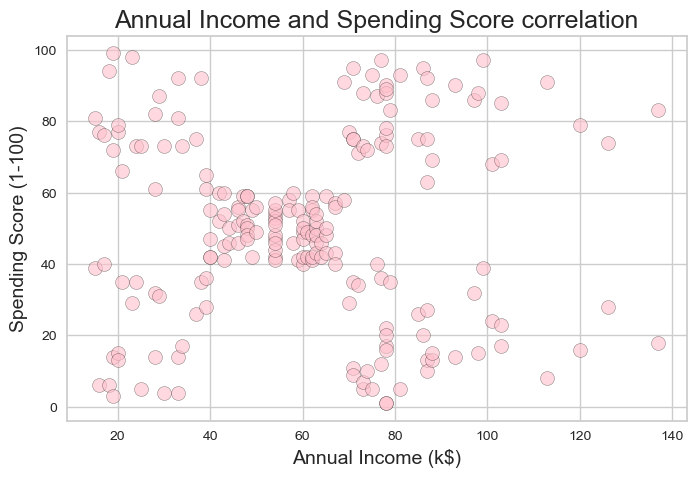

In [25]:
#Now let's see the relation with Annual Income and Spending Score correlation
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='pink',edgecolor='k',alpha=0.6, s=100)
plt.show()
#From that data, we can see that there are some people who earn not much and spent little, and others spent a lot
#In the middle, we can see that some of them who their income is in the middle spent in the middle as well
#the other part, who are more or a lot, some of them do not spend a lot, and some of them spend a lot.

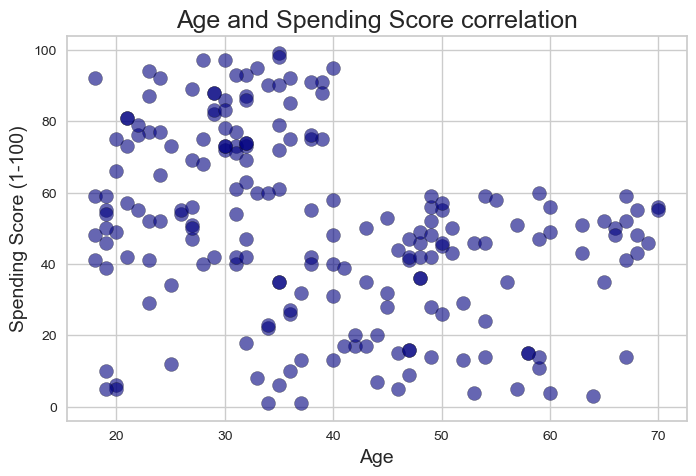

In [26]:
#Now, let's see the relation between Age and Spending Score correlation
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='navy',edgecolor='k',alpha=0.6, s=100)
plt.show()

#From the graph, we can see that the people between 20 to about 40 spent a lot compared to other ages.

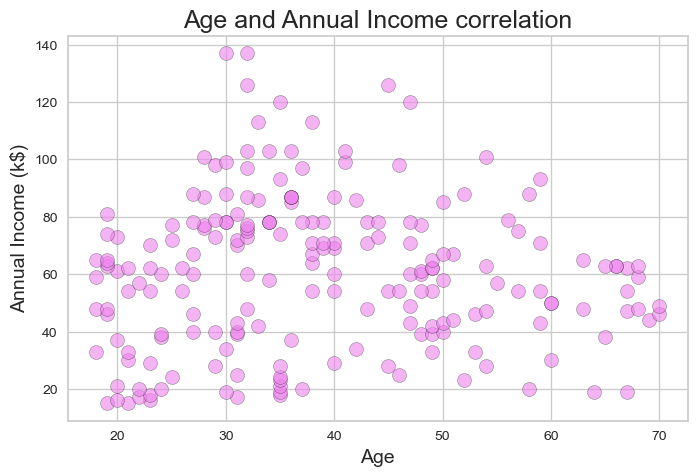

In [27]:
#Now, let's see the relation between Age and Annual Income correlation
plt.figure(figsize=(8,5))
plt.title("Age and Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='violet',edgecolor='k',alpha=0.6, s=100)
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [87]:
#Before i began, i have to drop the gender column first as K-mean does not work with categorical 
df_copy2 = df.drop(columns="Gender", inplace=True)
df_copy2
#So, first, i will assign it to a new one, so this will not affect my data.

### hopkins function 

In [29]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [30]:
#I need to see the hopkin of the data to know if it is suitable for clustring or not
hopkins(df_copy2, 0.5)
#As we can see, it is more than 0.5, so it is good for clustring

0.7021311745698408

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [31]:
#First, i will take 'Age','Spending Score (1-100)' from the data, and assign it to avariable
X1 = df[['Age','Spending Score (1-100)']]
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [32]:
#Next, i will see its hopkin
hopkins(X1, 0.3)
#As we can see, it is more than .5, so it is good for clustring

0.6909076680654392

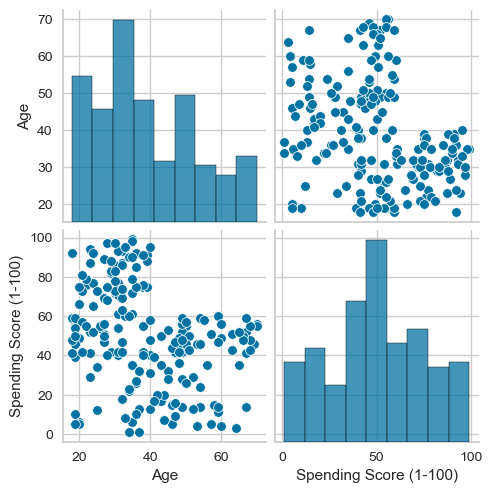

In [33]:
#Lets see them is a graph
sns.pairplot(X1);

#### *ii. Determine optimal number of clusters*

In [34]:
#To determine the optimal number of clustering, i can use inertia(elbow method) to do so.
#Or, i can use distortion (elbow method), which is in my opion is much clearer. 
#also, the silhoutte_score. 
#All of them help us to find th optimal number of clusters.

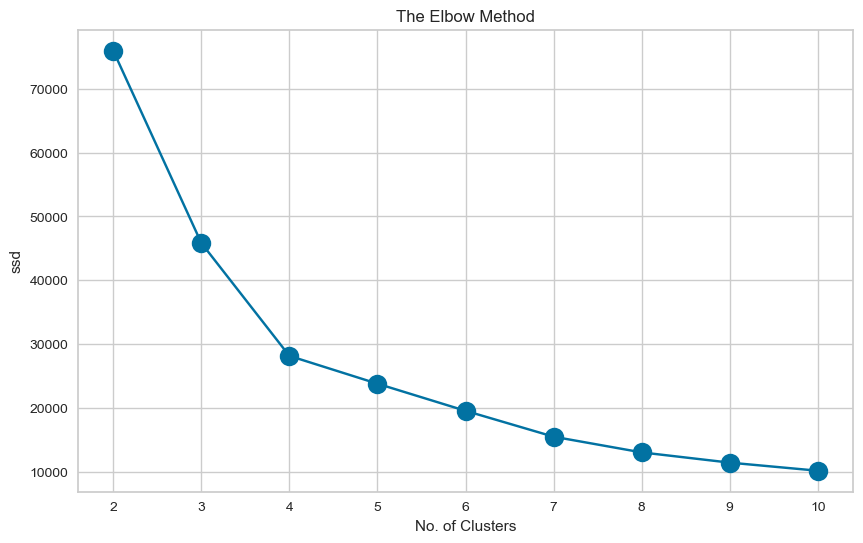

In [35]:
#In will use first inertia.
ssd = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)  # distances from each observation to each cluster centroid

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()
#we can see from the graph, the best number is 4.

In [36]:
#Now, let's see the silhouette score of each cluster.
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )
    
#As we can see from the graph, the best silhouette score is at cluster 4, which is 0.4997.
#So, the best number of clusters is 4.

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843
For n_clusters=10, the silhouette score is 0.40744304730373593


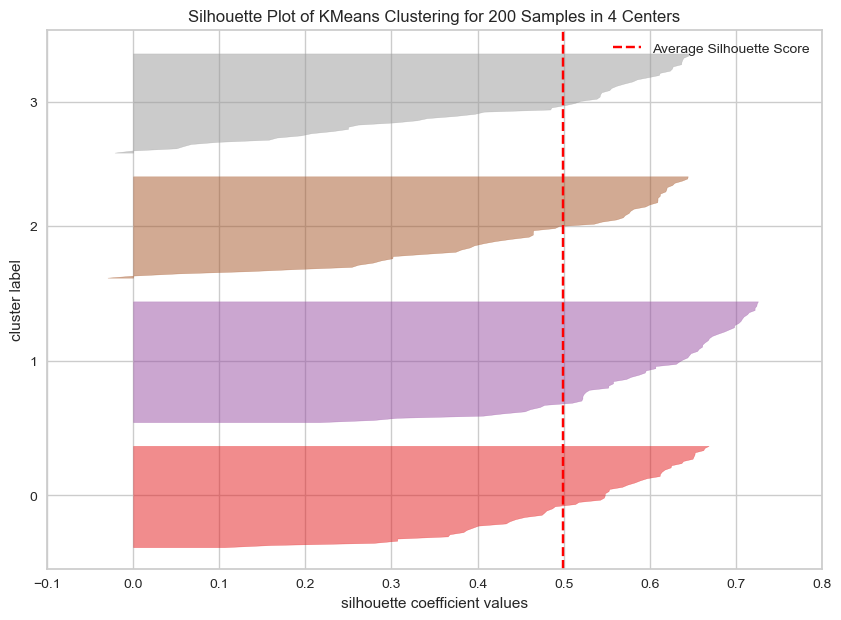

In [37]:
#Now, let's visualize it, and see it
model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X1)  
visualizer.poof()
plt.show()
#we can see that the silhouette score is at about 0.499.

In [38]:
#we can use alo n_clusters, to knwo the best number for our model
model.n_clusters
#As we can see, it is 4, as i said before, from the graph and the silhoutte score.

4

In [39]:
for i in range(4):
    label = (model.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5091299145013191
mean silhouette score for label 1      : 0.5960779476836082
mean silhouette score for label 2      : 0.45429047261675404
mean silhouette score for label 3      : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


### Why silhouette_score is negative?

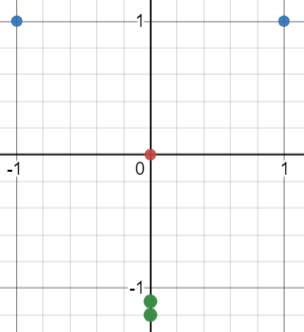

#### *iii. Apply K Means*

In [40]:
#Now, let's apply the K mean to X1.
kmeans = KMeans(n_clusters=4, random_state=42)
#As I figured out before, the number of clusters is 4, so it will put it 4.

#Now, i am going to fit_predict X1
kmeans.fit_predict(X1) 

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [41]:
X1_copy = X1.copy() #Now, i am going to take a copy of it
X1_copy

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [42]:
kmeans.labels_ 
#This is the labels of X1

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [43]:
#Now, let's add it to the dataframe with a new column
X1_copy["X1_cluster_Kmeans"] = kmeans.fit_predict(X1)

#Let's see it
X1_copy
#we can see from the dataframe, it has added successfuly

,Age,Spending Score (1-100),X1_cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

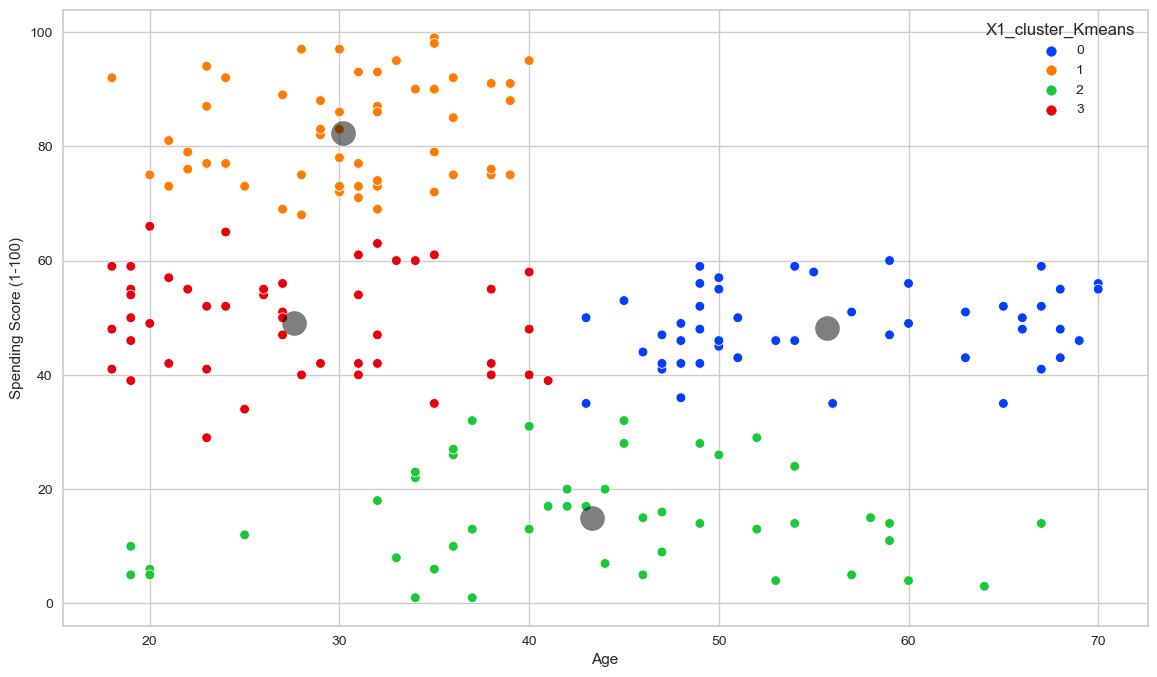

In [44]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='X1_cluster_Kmeans',
                data=X1_copy,
                palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

plt.show()
#From the graph, we can see that it has clustered to 4 group.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [45]:
#Now, i am going to create the other data for 'Annual Income (k$)', 'Spending Score (1-100)'
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [46]:
#Next, i will see its hopkins
hopkins(X2, 0.5)
#We can see that the result is higher than 0.5, so it is good for clustring

0.6643325226649479

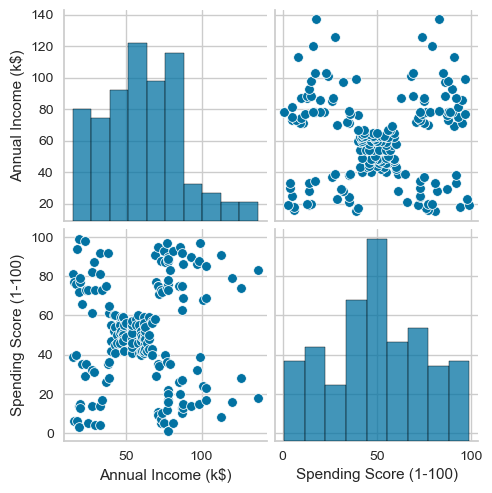

In [47]:
#Now, let's visualize the new data
sns.pairplot(X2)
plt.show()

#### *ii. Determine optimal number of clusters*

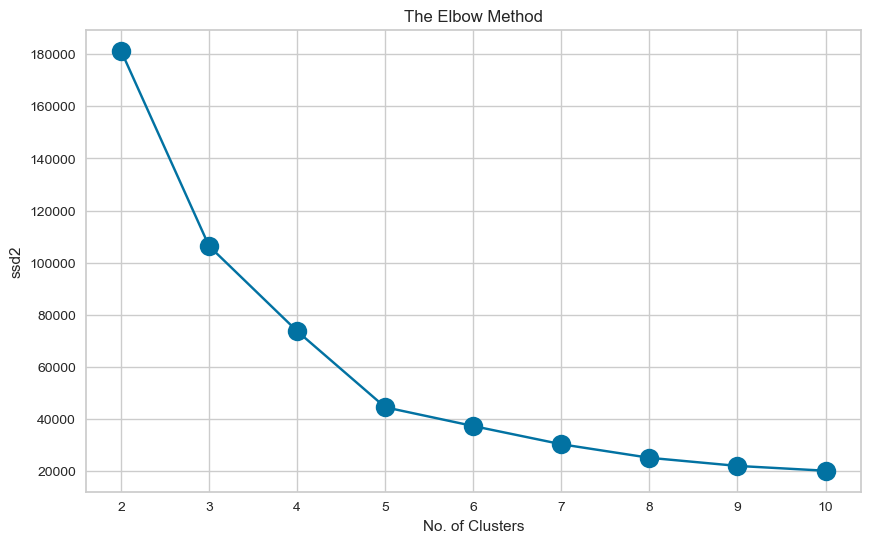

In [48]:
ssd2 = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2)
    ssd2.append(kmeans.inertia_)  # distances from each observation to each cluster centroid

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ssd2, "bo-",  markersize=14.0)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd2')
plt.show()

#From the graph, we can see that the best number of clusters is 5.

In [49]:
#Now, let's see the silhouette score of each cluster.
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )
    
#As we can see, the best silhouette score is at cluster 5, which is about 0.553
#So, the best number of clusters is 5.

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367
For n_clusters=10, the silhouette score is 0.4410568674364981


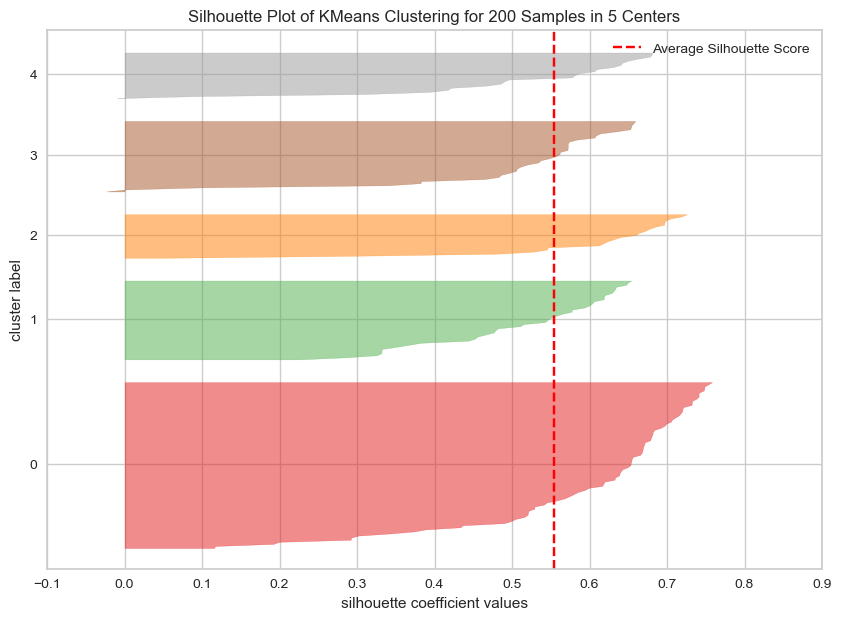

In [50]:
model2 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model2)

visualizer.fit(X2)  
visualizer.poof()
plt.show()
#As we can see from the graph, the silhouette is at 0.55.

In [51]:
for i in range(model2.n_clusters):
    label = (model2.labels_ == i)
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5966512190217801
mean silhouette score for label 1    : 0.5091706489322517
mean silhouette score for label 2    : 0.5990128687006722
mean silhouette score for label 3    : 0.5039873487056818
mean silhouette score for label 4    : 0.5122676140736505
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [52]:
#Now, let's apply the k mean to X2
#I have to put 5 to the number of clusters, as this is the number of clusters i have got from the graph and silhouette score
kmeans_2 = KMeans(n_clusters=5, random_state=42)


#Now, i will use fit_predict to it
kmeans_2.fit_predict(X2)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [53]:
X2_copy = X2.copy() #Now, i am going to take a copy of it
X2_copy

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [54]:
kmeans_2.labels_ 
#This is the labels of X2

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [55]:
#Now, let's add it to the dataframe with a new column
X2_copy["X2_cluster_Kmeans"] = kmeans_2.fit_predict(X2)

#Let's see it
X2_copy
#we can see from the dataframe, it has added successfuly

,Annual Income (k$),Spending Score (1-100),X2_cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


#### *iv. Visualizing and Labeling All the Clusters*

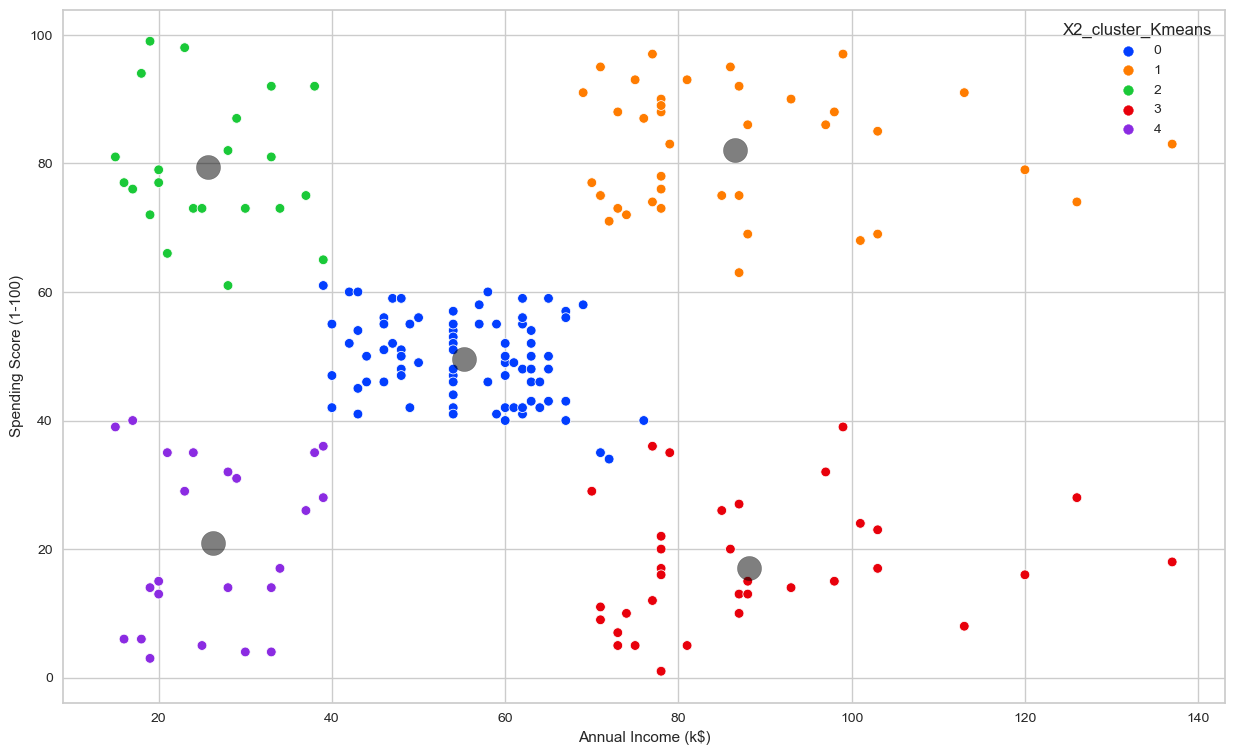

In [56]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='X2_cluster_Kmeans',
                data=X2_copy,
                palette="bright")
centers = kmeans_2.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

plt.show()

#As we can see from the graph, there are five clusters.
#The first cluster which is the people who earn less and spend less, which is a reasable thing
#The second one, the people who earn less and spen a lot, in my opion, these people love to spend.
#The third one, which is in the middle, who earn in the middle and they spend in the middle here, these people are managing their live.
#The fourth one, who earn a lot, but spend less, in my opion, these people are the cusion ones.
#The fifth one, who earn a lot and spend a lot. 

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [57]:
#I have defined in the k mean part, so i will just call it hereb
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [58]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

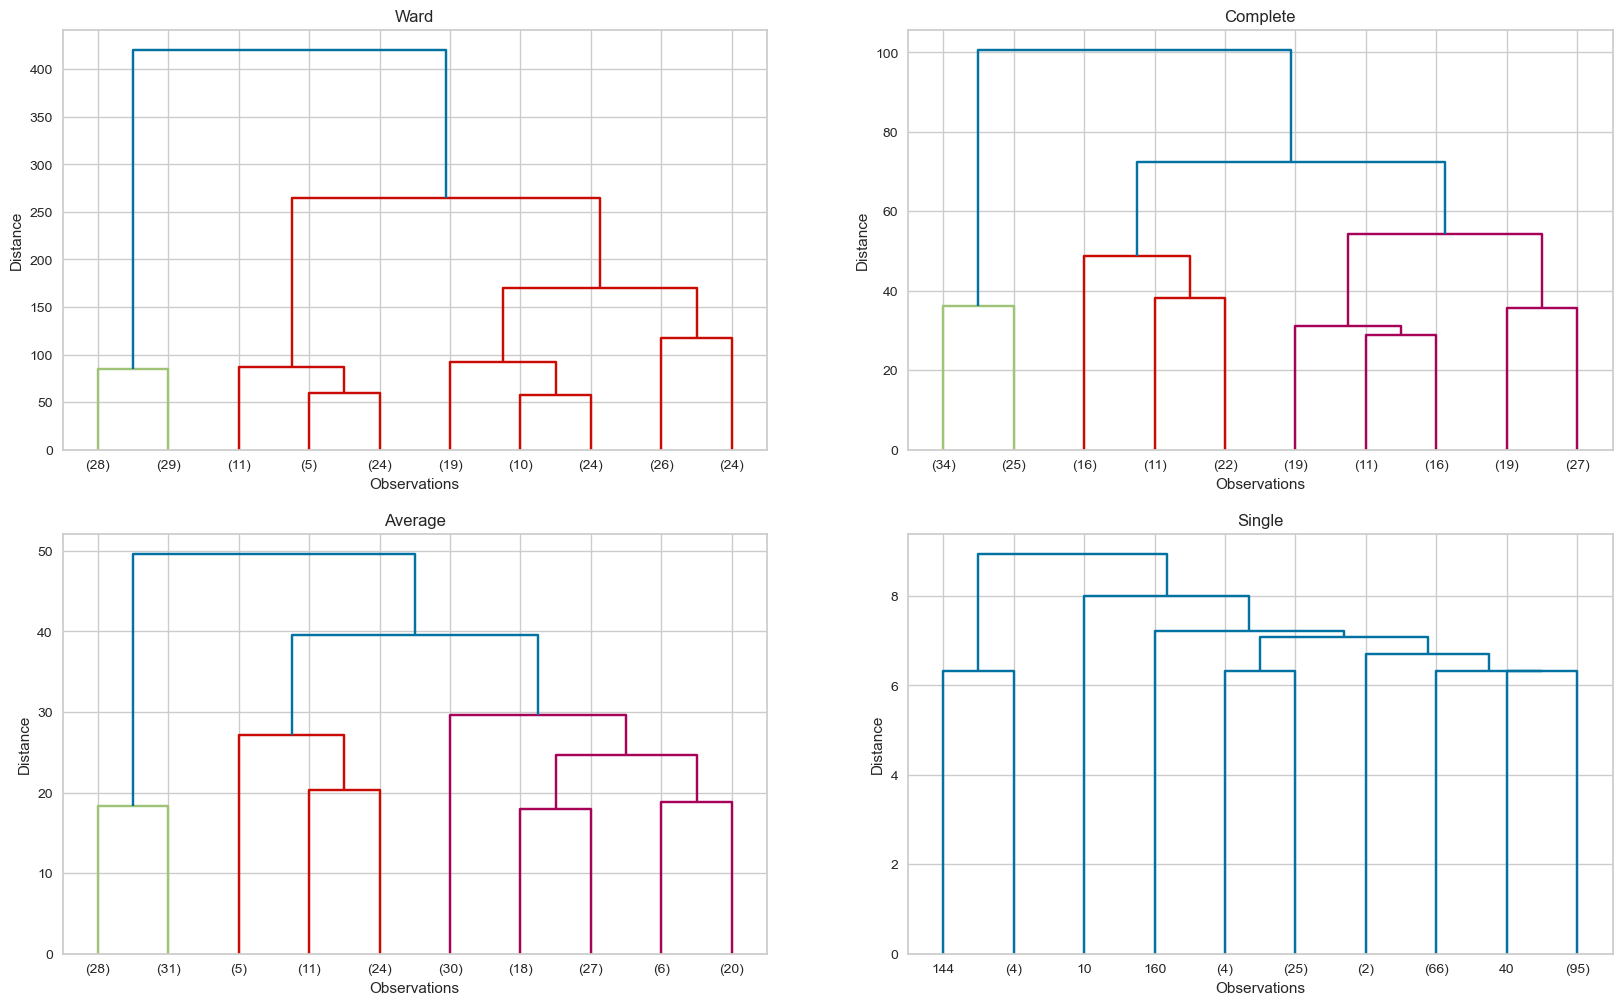

In [59]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);


#From the dendrogram, we can see that the number of clusters is 4 from ward.

In [60]:
#Now, i am going to use AgglomerativeClustering
K3 = range(2,10)

for k in K3:
    model3 = AgglomerativeClustering(n_clusters=k)
    model3.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model3.labels_)}')
    
#from this, we can see that the best Silhouette Score is at 4 clusters which is 0.460

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


<Figure size 2000x1000 with 0 Axes>

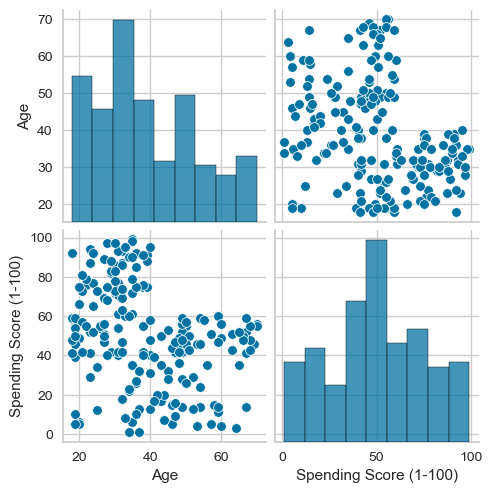

In [61]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X1, palette="bright");
plt.show()

## Clustering based on Annual Income and Spending Score- x2

In [62]:
#I have defined above, so i will call it.
X2

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### ii. *Apply Agglomerative Clustering*

In [63]:
hc_ward2 = linkage(y=X2, method="ward")
hc_complete2 = linkage(X2, "complete")
hc_average2 = linkage(X2, "average")
hc_single2 = linkage(X2, "single")

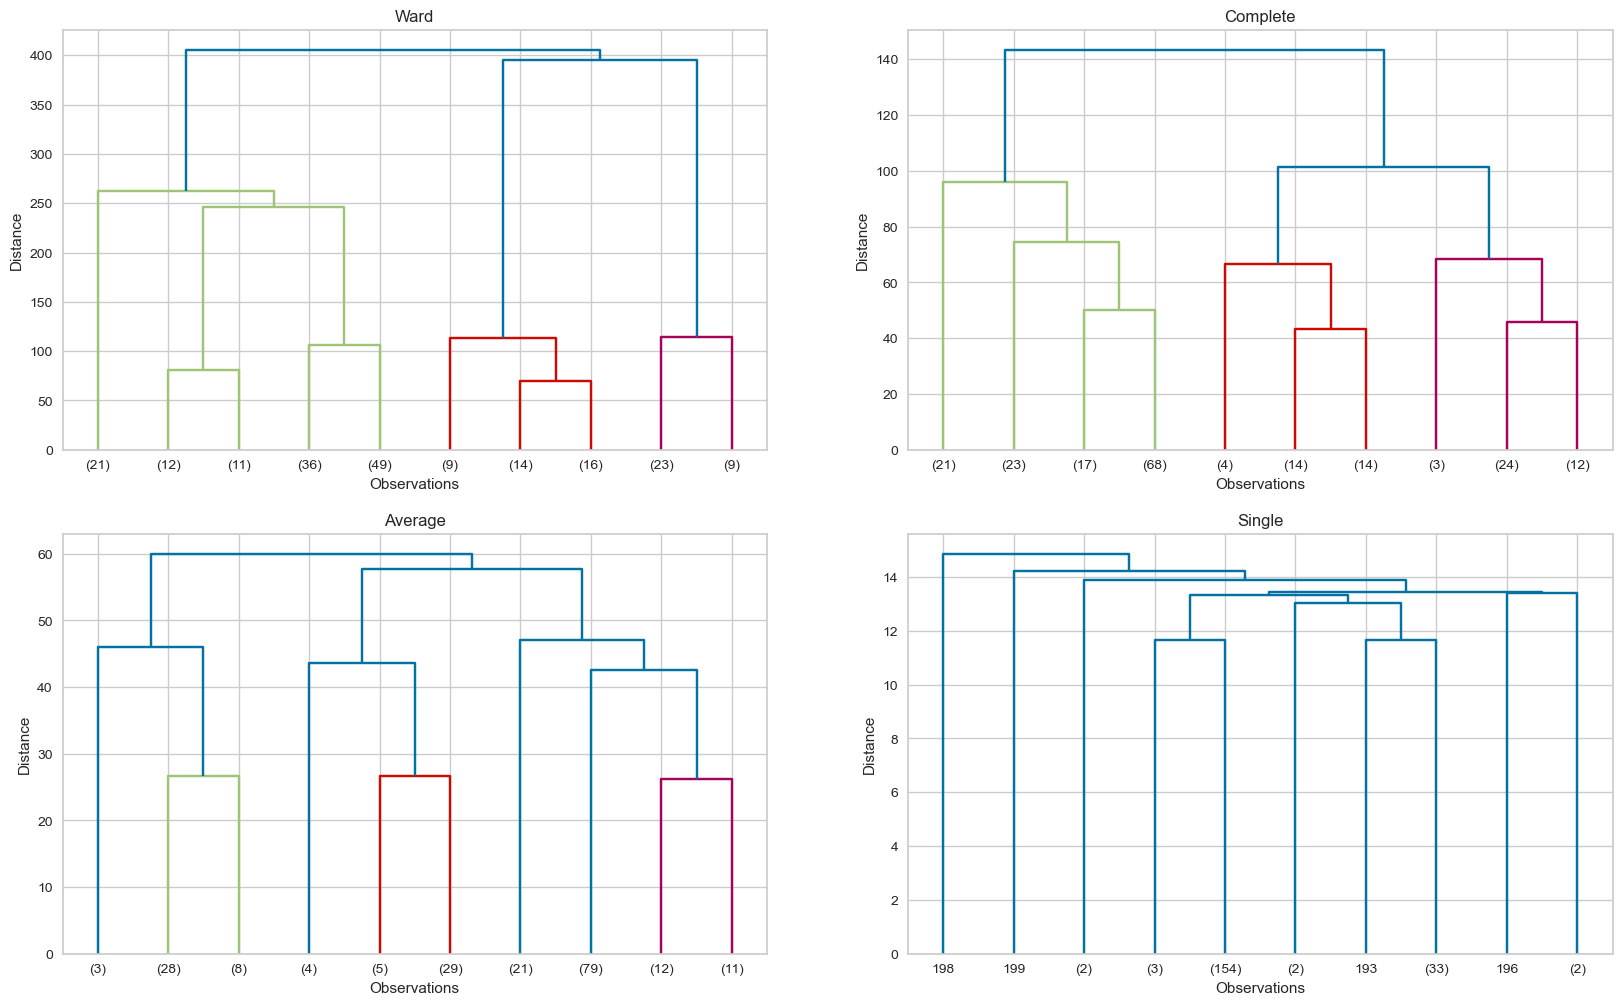

In [64]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward2, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete2, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average2, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single2, leaf_font_size=10, truncate_mode='lastp', p=10);


#From the dendrogram, we can see that the number of clusters is 5 from ward.

In [65]:
#Now, i am going to use AgglomerativeClustering
K4 = range(2,10)

for k in K4:
    model4 = AgglomerativeClustering(n_clusters=k)
    model4.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model4.labels_)}')
    
#from this, we can see that the best Silhouette Score is at 5 clusters which is 0.55

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


<Figure size 2000x1000 with 0 Axes>

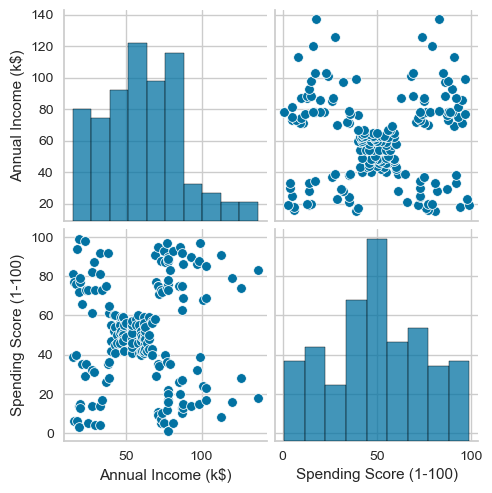

In [66]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X2, palette="bright");
plt.show()

#### Age and Spending Score- x1

In [67]:
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [68]:
#Now, let's use AgglomerativeClustering, and put 4 for number of clusters as i got from the dendegram
agg_model =  AgglomerativeClustering(n_clusters=4,
                                 affinity="euclidean",
                                 linkage="ward")

#Now, i am going to use fit_predict with X1
agg_x1 = model.fit_predict(X1) 

In [69]:
#This is the data frame that i have created before, now i will assign the value of agg_x1
X1_copy

,Age,Spending Score (1-100),X1_cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


In [70]:
#Now, let's assign a new column to the values of agg_x1 in the dataframe
X1_copy['cluster_Agg_X1'] = agg_x1
X1_copy.head()

,Age,Spending Score (1-100),X1_cluster_Kmeans,cluster_Agg_X1
0,19,39,3,3
1,21,81,1,1
2,20,6,2,2
3,23,77,1,1
4,31,40,3,3


#### Annual Income and Spending Score- x2

In [71]:
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [72]:
#Now, let's use AgglomerativeClustering, and put 5 for number of clusters as i got from the dendegram
agg_model2 =  AgglomerativeClustering(n_clusters=5,
                                 affinity="euclidean",
                                 linkage="ward")

#Now, i am going to use fit_predict with X2
agg_x2 = agg_model2.fit_predict(X2) 

In [73]:
#This is the data frame that i have created before, now i will assign the value of agg_x2
X2_copy

,Annual Income (k$),Spending Score (1-100),X2_cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


In [74]:
#Now, let's assign a new column to the values of agg_x2 in the dataframe
X2_copy['cluster_Agg_X2'] = agg_x2
X2_copy

,Annual Income (k$),Spending Score (1-100),X2_cluster_Kmeans,cluster_Agg_X2
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

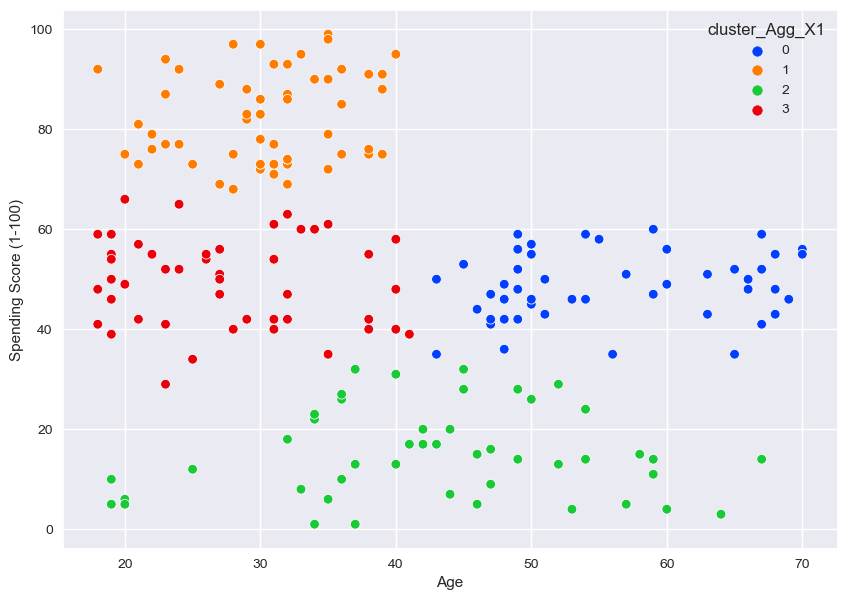

In [75]:
sns.set_style("darkgrid")
sns.scatterplot(x='Age',
                y="Spending Score (1-100)",
                hue='cluster_Agg_X1',
                data=X1_copy,
                palette="bright")

plt.show()
#As we can see from the graph, we can see that it has clustered as 4 clusters. 
#The first one, people who aged between 20 to 70, and spend less.
#The second one, people who aged between 20 and 40, and spend in the middle.
#The third one, people who aged between about 45 and 70 and spend in the middle.
#The fourth one, people who aged between 20 and 40 and spend a lot, more than the others.

#### Annual Income and Spending Score- x2

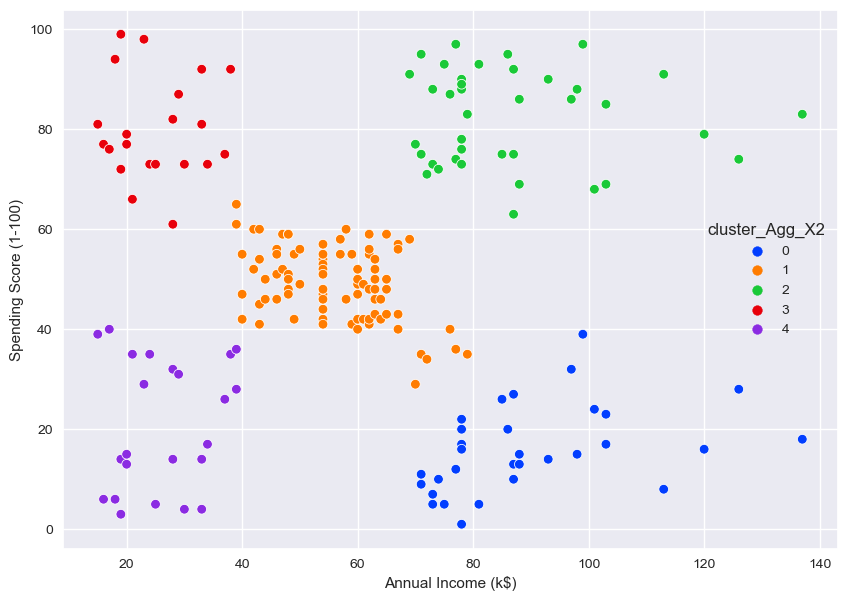

In [76]:
sns.set_style("darkgrid")
sns.scatterplot(x='Annual Income (k$)',
                y="Spending Score (1-100)",
                hue='cluster_Agg_X2',
                data=X2_copy,
                palette="bright")

plt.show()
#The same thing is happening here, it has created 5 clusters.
#The first one, for people whose annual income between 20 and 40 and spend less.
#The second one, whose annual income between 20 and 40 and spend a lot.
#The third one, whose annual income between 40 and 80, they spend in the middle .
#The fourth one, whose annual income is high between 75 and 140, but do not spend a lot.
#The fifthe one, whose annual income is high between 75 and 140, and spend a lot.

#### Interpretation based on Age and Spending Score- x1

In [77]:
X1_copy

,Age,Spending Score (1-100),X1_cluster_Kmeans,cluster_Agg_X1
0,19,39,3,3
1,21,81,1,1
2,20,6,2,2
3,23,77,1,1
4,31,40,3,3
...,...,...,...,...
195,35,79,1,1
196,45,28,2,2
197,32,74,1,1
198,32,18,2,2


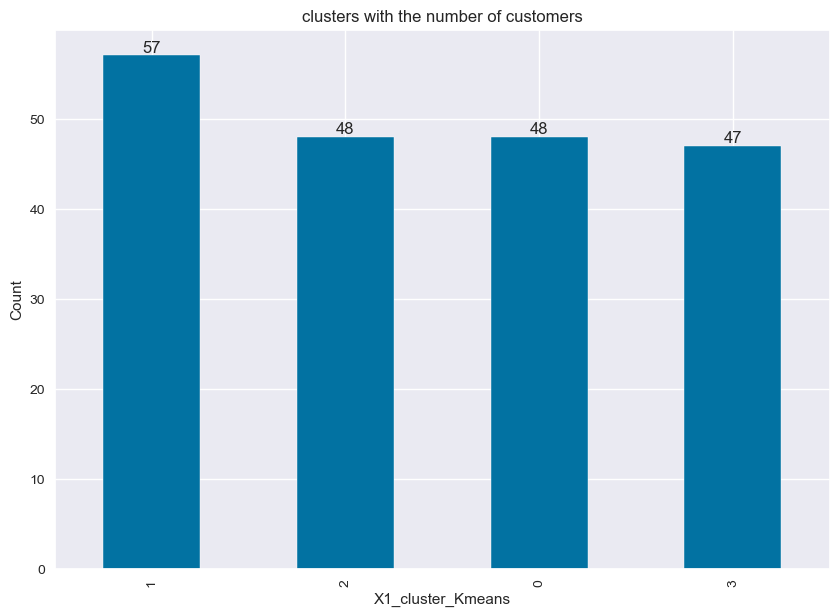

In [78]:
#Now, i am going to assign each cluster to its group. Before, there were four clusters, each one had assigned to a group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1_copy['X1_cluster_Kmeans'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()
#As we can see from the graph, cluster 1, has 57 one.
#cluster 2 and 0 have 48.
#and cluster 3 has 47. 
#Nearly, cluster 1 has the highest number.

In [79]:
#Now, let's add these values of clusters to the original data frame and assigned to a new column
df["Age_and_Spending_Score_cluster"] = X1_copy['X1_cluster_Kmeans']

#Seeing the result of it
df.head()

#As we can see, now our data frame has the new column with its cluster

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_and_Spending_Score_cluster
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


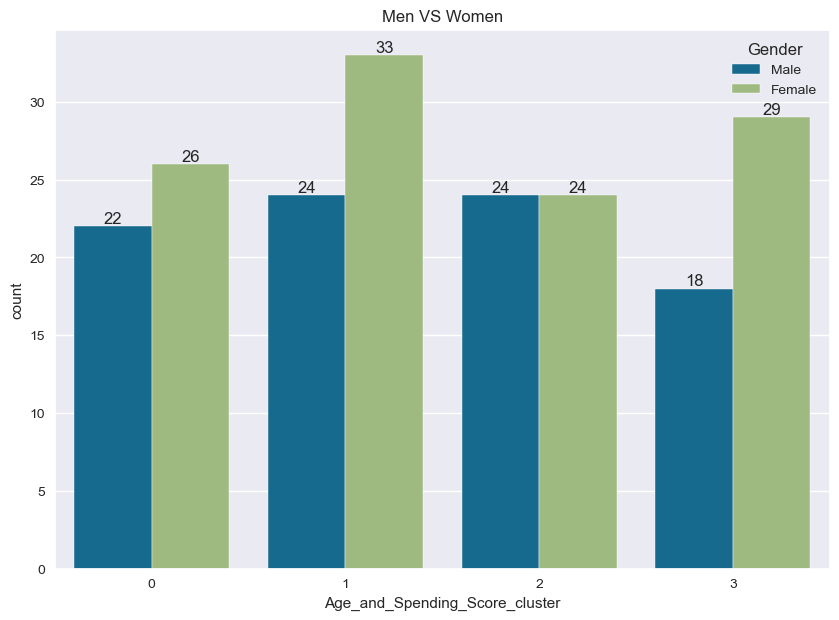

In [80]:
#Now, we can compare each gender, and see their spending score beside on their ages.
plt.title("Men VS Women")
plt.ylabel("Count")
ax = sns.countplot(x=df["Age_and_Spending_Score_cluster"], hue=df.Gender)
for c in ax.containers:
    ax.bar_label(c)
    
plt.show()

#As we can see from all the result, women spent more than men in nearly most of the clusters, but in cluster 2, they are equal.
#we can say that women spend more than men.

In [88]:
df.groupby("Age_and_Spending_Score_cluster").mean()
#We can see from the dataframe:

#Cluster 0:
#Cluster 0, which shows the people who aged aroud 55 are earning in the average and in
#the same time they are spending in the average. well i can say from my point of view that they are now much wiser and know 
#what they need and what they do not need.
#we can see from the previous graph that females in this group is spending more than men.


#Cluster 1:
#Cluster 1 who aged around 30, they are earning in average, but we can see that they are spending a lot. 
#In my point of view, i can say that these people like to spend.
#we can see from the previous graph that females in this group is spending more than men.


#Cluster 2:
#Cluster 2 who aged around 43, they are earning nearly the average, but they do not spend a lot at all. 
#In my point of view, i can say that these people are very cautious, and do not spend their money on any 
#thing they do not need. Or they prefer to put it in other things, like saving.
#we can see from the previous graph that females and men are spending the same.


#Cluster 3:
##Cluster 3 who aged around 27, or we can say the young people, they are earning in the average and spending 
#in the average as well. 
#we can see from the previous graph that females in this group is spending more than men.

,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_and_Spending_Score_cluster
Age_and_Spending_Score_cluster,,,,
0,55.708333,54.770833,48.229167,0.291667
1,30.175439,66.070175,82.350877,1.333333
2,43.291667,66.937500,15.020833,3.354167
3,27.617021,53.276596,49.148936,0.617021


### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [82]:
#Now, let's work with the second data set
X2_copy

,Annual Income (k$),Spending Score (1-100),X2_cluster_Kmeans,cluster_Agg_X2
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


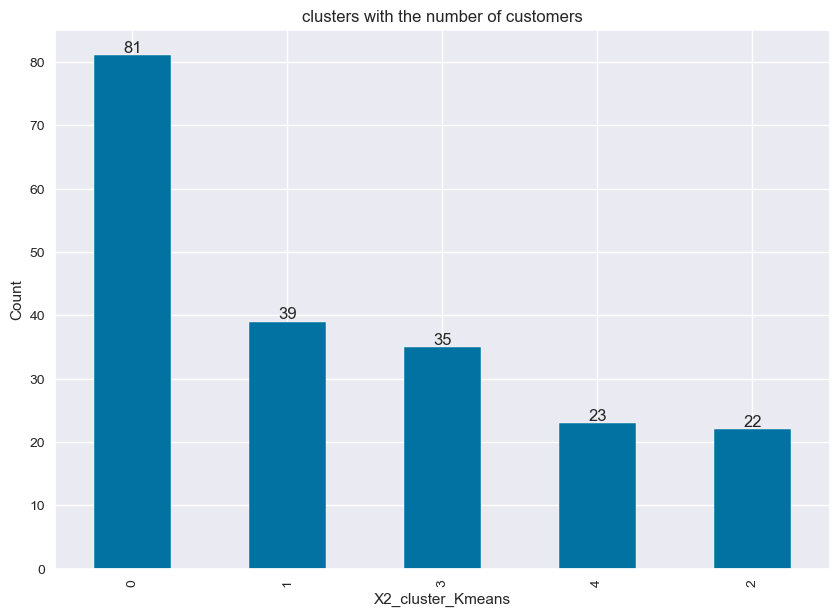

In [83]:
#Now, i am going to assign each cluster to its group. 
# Before, there were five clusters, each one had assigned to a group

plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2_copy['X2_cluster_Kmeans'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()


#As we can see from the graph, cluster 0 has the highest number which is 81. while cluster 1 and 3 got values in thirties,
#39 and 35 respectively. On the other hand, cluster 4 and 2, got the less numberes, 23 and 22.

In [84]:
#Now, let's add these values of clusters to the original data frame and assigned to a new column
df["Annual_Income_and_Spending_Score_cluster"] = X2_copy['X2_cluster_Kmeans']


#Seeing the result of it
df.head()

#As we can see, now our data frame has the new column with its cluster

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_and_Spending_Score_cluster,Annual_Income_and_Spending_Score_cluster
0,Male,19,15,39,3,4
1,Male,21,15,81,1,2
2,Female,20,16,6,2,4
3,Female,23,16,77,1,2
4,Female,31,17,40,3,4


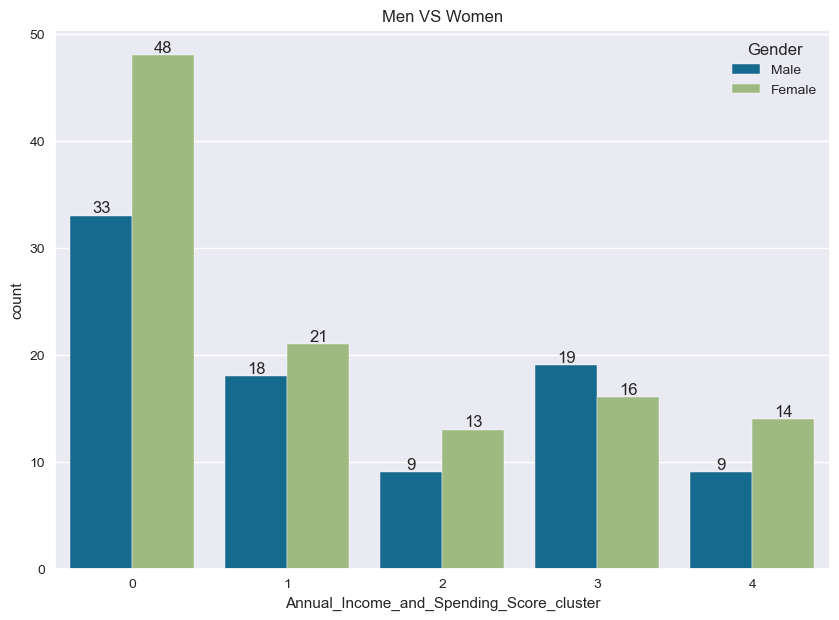

In [85]:
#Now, we can compare each gender, and see their spending score beside on their ages.
plt.title("Men VS Women")
plt.ylabel("Count")
ax = sns.countplot(x=df["Annual_Income_and_Spending_Score_cluster"], hue=df.Gender)
for c in ax.containers:
    ax.bar_label(c)
    
plt.show()

#As we can see from the graph, in cluster 0, we got the highest numbers compared with the other clusters.
#And for them, femal is much higher than men.

#Cluster 1, females is higher than men by about 3. 

#Cluster 2, also females is higher than men by around 4.

#Cluster 3, for the first time, men is higher than females by about 3.

#Cluster 4, females is higher than men. 

#we can conclude that cluster 0, is the highest one at both females and men.

In [86]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age_and_Spending_Score_cluster,Annual_Income_and_Spending_Score_cluster
0,Male,19,15,39,3,4
1,Male,21,15,81,1,2
2,Female,20,16,6,2,4
3,Female,23,16,77,1,2
4,Female,31,17,40,3,4


In [89]:
df.groupby("Annual_Income_and_Spending_Score_cluster").mean()

#We can see from the dataframe:

#Cluster 0:
#we can say that people who aged around 42 and earn in the average, spend in the average.

#Cluster 1:
#we can say that people who aged around 32 and earn a lot, spend a lot. this is the people who love spending...

#Cluster 2: 
#we can say that people who aged around 25 and earn less or a little are spending a lot, despite their income. 
#This is the kind of people who just love to spend

#Cluster 3:
#we can say that peopel who aged around 41 and are a lot, but do not spend a lot at all. (saving people)

#Cluster 4:
#we can say that people who aged around 45 and earn a little and spend a little. 

,Age,Annual Income (k$),Spending Score (1-100),Age_and_Spending_Score_cluster
Annual_Income_and_Spending_Score_cluster,,,,
0,42.716049,55.296296,49.518519,1.370370
1,32.692308,86.538462,82.128205,1.051282
2,25.272727,25.727273,79.363636,1.272727
3,41.114286,88.200000,17.114286,1.942857
4,45.217391,26.304348,20.913043,2.000000


## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

In [100]:
#The people who are in around 43 and their annual income in the average are 
#spending in the average as well.

#for people who are around 33, and earn a lot, spend alot.

#for people who are around 25 and earn a little, are spending too much.

#for people who are around 41 and earn a lot, but do not spend a lot. Their spending score is the lowest one.

#for people who are around 45 and earn a little and spending a little , and their spening score is low.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___